In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## [ ONE ]

Consider two distant galaxies both along the same line of sight. The closest galaxy is at a redshift $z_{1}$ and the more distant galaxy at a redshift $z_{2}$. By considering how a photon might travel from galaxy 2 to galaxy 1 and then to an observer at redshift 0, calcualate:

a. The redshift of second galaxy if observed from the first galaxy (in terms in $z_{1}$ and $z_{2}$).

b. For a flat universe with $\Omega_{m} = 1$ (Einstein-deSitter) calculate the angular diameter distance to galaxy 1 and 2 (if $z_{1} = 0.5$ and $z_{2} = 1.6$) and the angular diameter distance from galaxy 1 to galaxy 2.

c. Comment on the similarity or difference between these values.

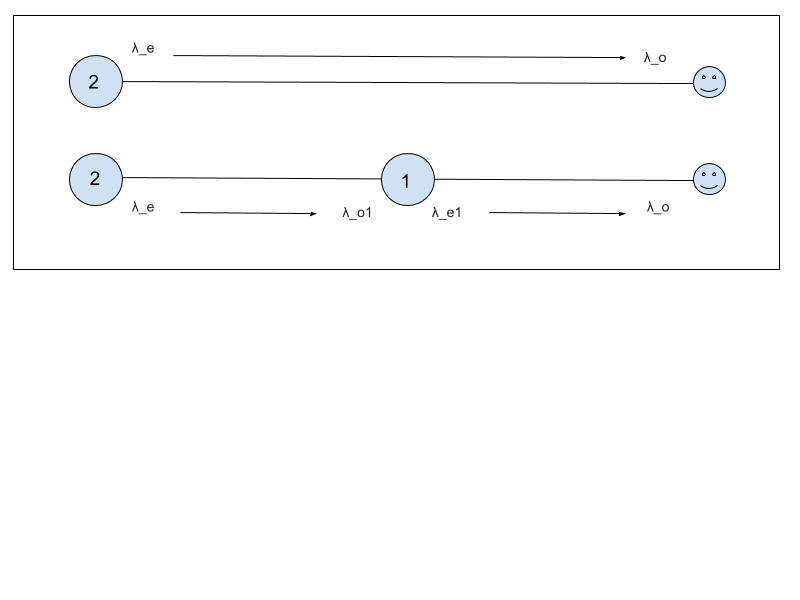

In [2]:
from IPython.display import Image
Image(filename="/Users/danielleskinner/Downloads/Untitled document.png")

### [a]

To figure out the redshift of the second galaxy if oberserved from the first galaxy, a few things need to be defined. Redshift can be neatly written in terms of the emitted and observed wavelengths: $\lambda_{o} = (1+z)\lambda_{e}$ 

Using the diagram I drew above, I will define the redshift of galaxy 2 from galaxy 1 as: $\lambda_{o,1} = (1+z_{n})\lambda_{e}$. Here, $\lambda_{o,1}$ is the wavelength observed from galaxy 2 at galaxy 1, $z_{n}$ is the redshift of galaxy 2 in terms of galaxy 1, and $\lambda_{e}$ is the emitted wavelength from galaxy 2.

The observed wavelength for each galaxy from the observers perspective, in terms of variables in the diagram, can be written as: 

<center> $\lambda_{o} = (1+z_{2}) \lambda_{e}$ </center>
<center> $\lambda_{o} = (1+z_{1}) \lambda_{e,1}$ </center>

These can be set equal to each other and it can be recognized that $\lambda_{o,1} = \lambda_{e,1}$, assuming the light doesn't interact with the galaxy itself. 

Solving for $\lambda_{o,1}$ in the equation for the redshift of galaxy 2 from galaxy 2, plugging it in to the previous equation, and solving for $z_{n}$ yields the equation:

\begin{equation}
    z_{n} = \frac{1+z_{2}}{1+z_{1}} -1
\end{equation}

### [b] 
To calculate the angular diameter distances of the galaxies, the following equation can be used:
\begin{equation}
    d_{a} = \frac{S_{k}(r)}{1+z}
\end{equation}

For the Einstein-deSitter Universe, this equation reduces to:
\begin{equation}
    d_{a} = \frac{r}{1+z}
\end{equation}

Where r is the current proper distance with the following equation:
\begin{equation}
    r = \int_{0}^{z} \frac{c \ dz}{H_{0} \sqrt{\Omega_{m,0} (1+z)^{3}}}
\end{equation}

The angular diameter distance from the observer to galaxy 1, observer to galaxy 2 and the angular diameter distance of galaxy 2 from galaxy 1 is calculated in the cell below:

In [3]:
from scipy import integrate
import numpy as np

#Needed variables
z_1 = 0.5
z_2 = 1.6
c = 3.0*(10**8)
H = 70 * (3.241*(10**-20)) #Change units if needed.
conv = (3.24078E-23) #[Mpc/m]

#a
z_n = ((1+z_2)/(1+z_1)) - 1
print 'Redshift of galaxy 2 as observed from galaxy 1 = ', z_n

#b
def proper(z):
    return ((1+z)**3)**(-0.5)

a_1o = integrate.quad(proper, 0, z_1)[0] * c * 1/H * (1/(1+z_1))
a_2o = integrate.quad(proper, 0, z_2)[0] * c * 1/H * (1/(1+z_2))
a_21 = integrate.quad(proper, 0, z_n)[0] * c * 1/H * (1/(1+z_n))

print 'Angular diameter distance from observer to galaxy 1 = ', a_1o * conv, ' Mpc'
print 'Angular diameter distance from observer to galaxy 2 = ', a_2o * conv, ' Mpc'
print 'Angular diameter distance from galaxy 1 to galaxy 2 = ', a_21 * conv, ' Mpc'

Redshift of galaxy 2 as observed from galaxy 1 =  0.733333333333
Angular diameter distance from observer to galaxy 1 =  1048.51978747  Mpc
Angular diameter distance from observer to galaxy 2 =  1252.0897066  Mpc
Angular diameter distance from galaxy 1 to galaxy 2 =  1188.93537287  Mpc


### [c]

As seen in class, the angular diameter distance increases ($d\theta$ decreases) up to a critical redshift value, then it starts to decrease ($d\theta$ increases). For the benchmark model, this value is 1.6. This will be slightly different for an Einstein-deSitter Universe. 

It is expected that the angular diameter distance from the observer to galaxy 2 should be larger than the angular diameter distance from the observer to galaxy 1. This is because galaxy one is at a redshift of 0.5, smaller than the critical value, and galaxy two is at a redshift of 1.6, right around the critical value. So the angular diameter distance should increase from $z_{1}$ to $z_{2}$. 

The angular diameter distance from galaxy 1 to galaxy 2 seems to be between the previous two values. Galaxy 2 sits at a redshift of about 0.73 relative to galaxy 1. So it's expected that this value should be higher than the angular diameter distance from the observer to galaxy 1 and that this value should be lower than the angular diameter distance from the observer to galaxy 2.

## [ TWO ] 
Problem 8.5 in Ryden: Note there is a type in the problem (it states that the velocity dispersion units are $\frac{km}{s^{3}}$ rather than the correct units of $\frac{km}{s}$). Compare this with the collision time between Andromeda (M31) and the Milky Way (Andromeda is 700 kpc away and is moving towards us at 120 $\frac{km}{s}$.

In order to calculate the mean number density of galaxies within the half-mass radius, the following equation can be used:

\begin{equation} 
    \frac{Avg \ Galaxies}{volume} = \frac{N}{V}
\end{equation}
where
\begin{equation}
    N = 1000 \ galaxies
\end{equation}

\begin{equation}
    V = \frac{4\pi}{3} R_{h}^{3}
\end{equation}

Plugging in values, the mean number density of galaxies within the half-mass radius is:

\begin{equation}
    \frac{Avg \ Galaxies}{volume} = \frac{1000}{\frac{4\pi}{3} (1.5)^{3}} \ \ \left [ \frac{Galaxies}{Mpc^{3}} \right ] = 70.74 \ \ \left [ \frac{Galaxies}{Mpc^{3}} \right ]
\end{equation}

To calculate how far a galaxy in the Coma cluster will travel, on average, before it collides with another galaxy, I can think about this in terms of a problem I solved in the second homework. I can calculate a length per collision to solve this problem.

\begin{equation}
    r = \frac{length}{collision}
\end{equation}
Where
\begin{equation}
    length = vt
\end{equation}

\begin{equation}
    collision = \Sigma \ vt \ N_{average \ galaxies}
\end{equation}

Here, $\Sigma = 10^{-3} \ Mpc^{2}$, and $ N_{average \ galaxies} $ is the value calculated in the first step. This yields a value of:

\begin{equation}
    r = \frac{1}{\Sigma \ N_{average \ galaxies}} = 14.14 \ \frac{Mpc}{collision}
\end{equation}

To calculate the average time between collisions for a galaxy in the Coma cluster, the average distance calculated above needs to be divided by the velocity dispersion of the Coma cluster. The velocity dispersion of the Coma cluster is $\sigma = 880 \left [ \frac{km}{s} \right ]$. After converting this from km/s to Mpc/s, the average time between collisions can be calculated as follows:

\begin{equation}
    Avg \ time = \frac{r}{\sigma}
\end{equation}

Divide the final value by 31557600000000000 (conversion rate from seconds to Gyrs), and the average time between collisions becomes:

\begin{equation}
    Avg \ time = 15.71 \ \frac{Gyr}{collision}
\end{equation}

This value is longer than the Hubble time (approximately 14 Gyrs)! My discussion comparing this with the collision time between Andromeda and the Milky Way is at the end of the cell below.

In [4]:
import math
from decimal import Decimal

N = 1000 #galaxies
r_h = 1.5 # Mpc
sig = 10.**(-3) #Mpc^2

#What is the mean number density of galaxies within the half-mass radius?
V = (4/3.) * math.pi * (r_h)**3
avg_gal = N / V
print 'Mean number density of galaxies = ', avg_gal, 'galaxies/Mpc^3'

#How far will a galaxy in the Coma cluster travel, on average, before it collides with another galaxy?
avg_dist = 1. / (sig * avg_gal)
print 'Average distance before collision = ', avg_dist, 'Mpc'

#What is the average time between collisions for a galaxy in the Coma cluster?
vel_disp = 880 #km/s
conv = 3.085677581e+19 # _km = 1 Mpc 
vel = 880 * (1/conv)
avg_time = (avg_dist / vel) / (31557600000000000) #Gyrs
print 'Average time between collisions = ', avg_time, 'Gyrs. This is longer than the Hubble time!'

#Collision time between Andromeda and the Milky Way:
coll_time = 700. / (120*(3.24078E-17)) / (31557600000000000) #Gyrs
print 'Collision time between Andromeda and the Milky Way = ', coll_time,'Gyrs.'
print '\n'
print 'Andromeda will collide with the Milky way in 5.7 Gigayears, a little less than half the hubble time, compared with the collision time for a galaxy in the Coma cluster, which is 15 Gigayears, longer than the hubble time. '


Mean number density of galaxies =  70.7355302631 galaxies/Mpc^3
Average distance before collision =  14.1371669412 Mpc
Average time between collisions =  15.7081953062 Gyrs. This is longer than the Hubble time!
Collision time between Andromeda and the Milky Way =  5.70378670922 Gyrs.


Andromeda will collide with the Milky way in 5.7 Gigayears, a little less than half the hubble time, compared with the collision time for a galaxy in the Coma cluster, which is 15 Gigayears, longer than the hubble time. 
